In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
balance_data=pd.read_csv('BalanceScale.csv')

In [5]:
balance_data.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [9]:
x=balance_data.values[:,1:5]
y=balance_data.values[:,0]

In [10]:
x

array([[1, 1, 1, 2],
       [1, 1, 1, 3],
       [1, 1, 1, 4],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]], dtype=object)

In [11]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'B',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'B',
       'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B',
       'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'B',
       'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'B', 'R', 'R', 'R', 'B',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L', 'B',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=4)

In [14]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [16]:
y_pred_en=clf_entropy.predict(x_test)
print(y_pred_en)

['R' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'B'
 'L' 'L' 'R' 'R' 'L' 'B' 'B' 'R' 'L' 'L' 'L' 'B' 'B' 'L' 'R' 'L' 'R' 'R'
 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'B' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L'
 'L' 'L' 'L' 'R' 'L' 'L' 'B' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'R'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'L'
 'L' 'R' 'R' 'B' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'B']


In [17]:
y_pred_en_val=clf_entropy.predict([[5,8,9,5]])

In [18]:
y_pred_en_val

array(['B'], dtype=object)

In [19]:
accuracy_score(y_test,y_pred_en)

0.816

In [20]:
confusion_matrix=confusion_matrix(y_test,y_pred_en)
print(confusion_matrix)

[[ 1  3  5]
 [ 6 52  4]
 [ 3  2 49]]


In [21]:
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

           B       0.10      0.11      0.11         9
           L       0.91      0.84      0.87        62
           R       0.84      0.91      0.88        54

    accuracy                           0.82       125
   macro avg       0.62      0.62      0.62       125
weighted avg       0.82      0.82      0.82       125



In [22]:
import seaborn as sb
cm=pd.DataFrame(confusion_matrix)

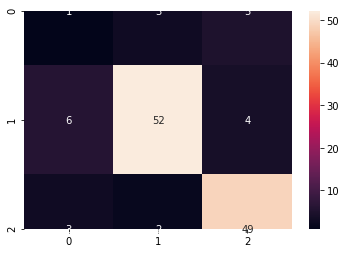

In [25]:
import matplotlib.pyplot as plt
sb.heatmap(cm,annot=True,fmt="d")
plt.show()